## 5. Feature Importance and Permutation feature importance
In this notebook we are looking at the feature importances  as well as the Permutation feature importances
for the Random Forest Regressor.

In [31]:
# load modules
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from modeling.features import get_feature_combinations
from sklearn.svm import SVR
from lightgbm import LGBMRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


In [32]:
# loading the dataset
data = pd.read_csv('../data/GEFCom2014Data/Wind/clean_data.csv', 
                    parse_dates= ['TIMESTAMP'],
                    index_col= 'TIMESTAMP' )

In [33]:
# train-test-split and get features
data_train = data[:'2013-07-01 00:00:00']
data_test = data['2013-07-01 01:00:00']
feature_dict = get_feature_combinations()

/tmp/ipykernel_15786/55602017.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_test = data['2013-07-01 01:00:00']


### Feature importance

In [38]:
X = data_train.drop(['TARGETVAR', 'ZONEID'], axis=1)
y = data_train.TARGETVAR
forest = RandomForestRegressor()
forest.fit(X, y)


RandomForestRegressor()

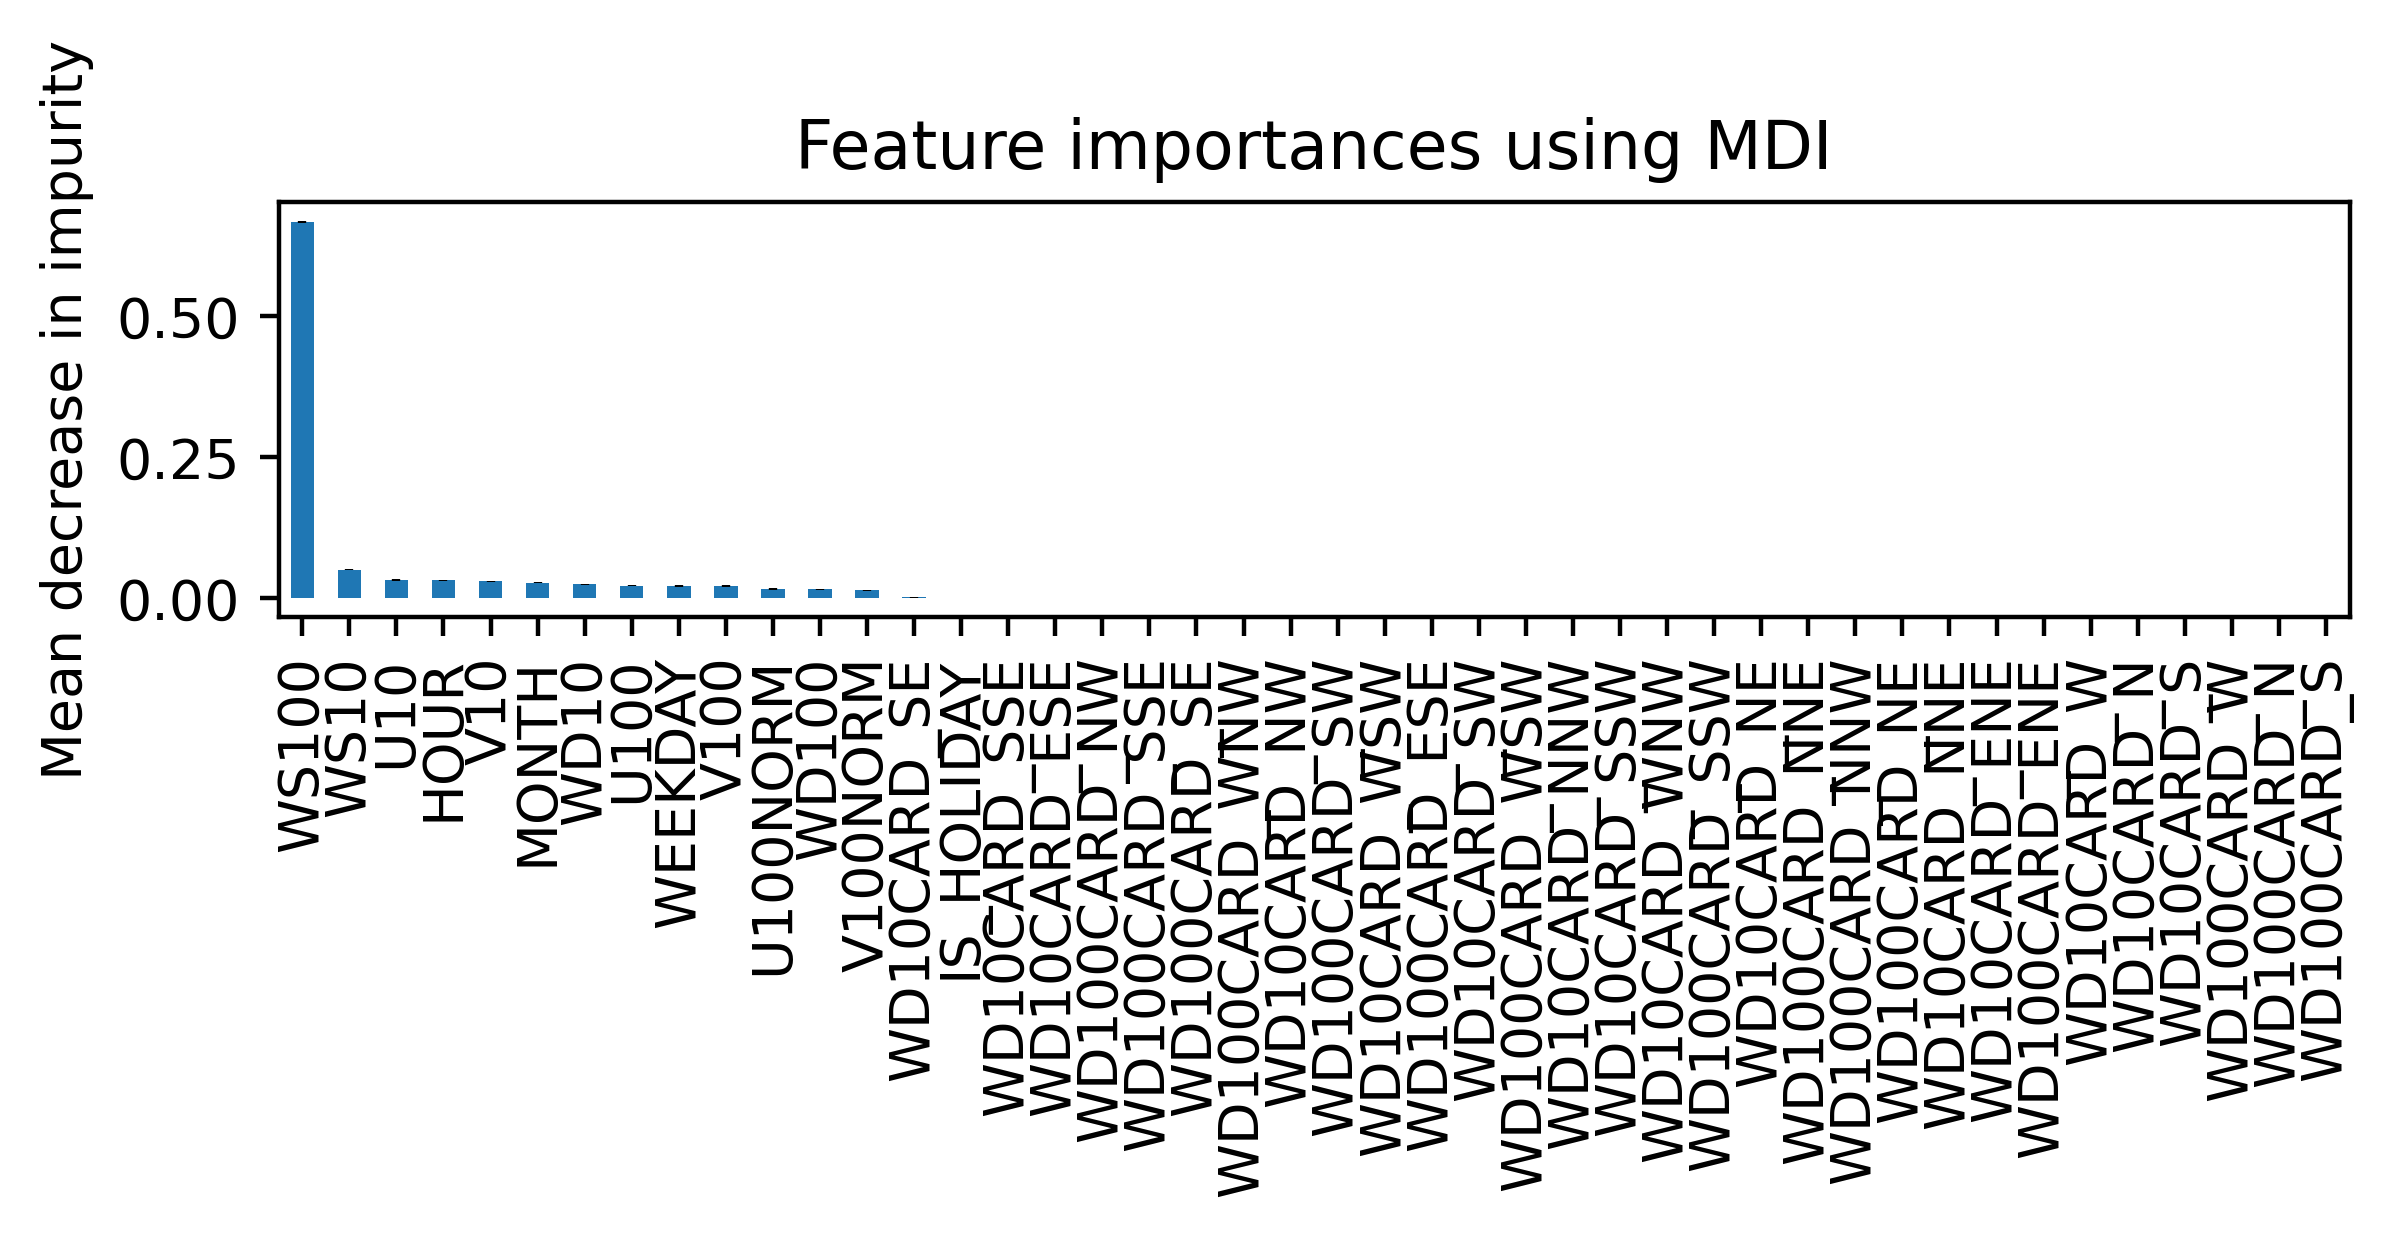

In [39]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Feature importances using MDI (Mean decrease in impurity)
fig, ax = plt.subplots(figsize = (6, 3), dpi = 400)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Permutation feature importance